In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [3]:
import matplotlib.pyplot  as plt
import random

In [4]:
X_train = np.loadtxt('input.csv',delimiter = ',')
Y_train = np.loadtxt('labels.csv',delimiter = ',')

X_test = np.loadtxt('input_test.csv',delimiter = ',')
Y_test= np.loadtxt('labels_test.csv',delimiter=',')

In [5]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

In [6]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("shape of Y_test: ",Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
shape of Y_test:  (400, 1)


In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

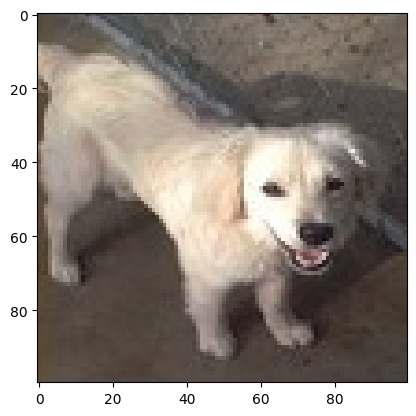

In [54]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])

In [ ]:
##Model
model = Sequential([
        Conv2D(32, (3,3),activation='relu',input_shape = (100,100,3)),
        MaxPooling2D((2,2)),

        Conv2D(32, (3,3),activation='relu',input_shape = (100,100,3)),
        MaxPooling2D((2,2)),

        Flatten(),
        Dense(64,activation='relu'),
        Dense(1,activation='sigmoid')
])

In [20]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [24]:
model.fit(X_train,Y_train,epochs = 5,batch_size= 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9635 - loss: 0.1215
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9735 - loss: 0.0971
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9785 - loss: 0.0811
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9900 - loss: 0.0611
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9850 - loss: 0.0587


In [25]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7050 - loss: 1.0696


[1.06961989402771, 0.7049999833106995]

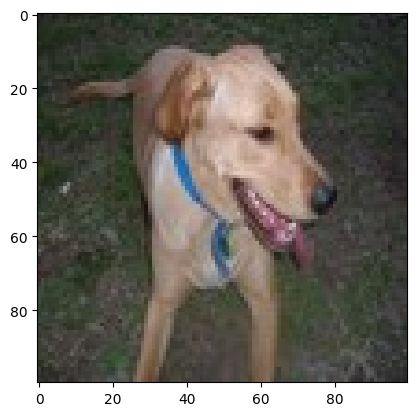

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Our model says it is a : Dog


In [48]:
#Making predicitons
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
   pred = 'Dog'
else:
   pred = 'Cat'      

print("Our model says it is a :",pred)
 